In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
# ligand binding according to the elementary equation L + R --> L - R
# there is a forwards and backwards reaction with two rate constants k1 (forwards) and k2 (backwards)
# assume concentrations of Ligands and receptors remain constant

In [38]:

def ligand_binding(t, y, k1, k2, Lt, Rt):
    L_R = y
    dLRdt = k1 * (Lt - L_R) * (Rt - L_R) - k2 * L_R
    return dLRdt

# parameters
k1 = 10 ** 4
k2 = 10 ** -5
Lt = 10 ** -6
Rt = 10 ** -6
t_span = (0, 3600)
# initial level of L-R is zero
LR0 = 0
t_eval = np.linspace(0, 3600, 500)
solution = solve_ivp(ligand_binding, t_span, [LR0], args = (k1, k2, Lt, Rt),t_eval = t_eval, method = 'DOP853')
# I tried various integration methods and this came out the nicest
t = solution.t
LR = solution.y[0]
L = Lt - LR
R = Rt - LR

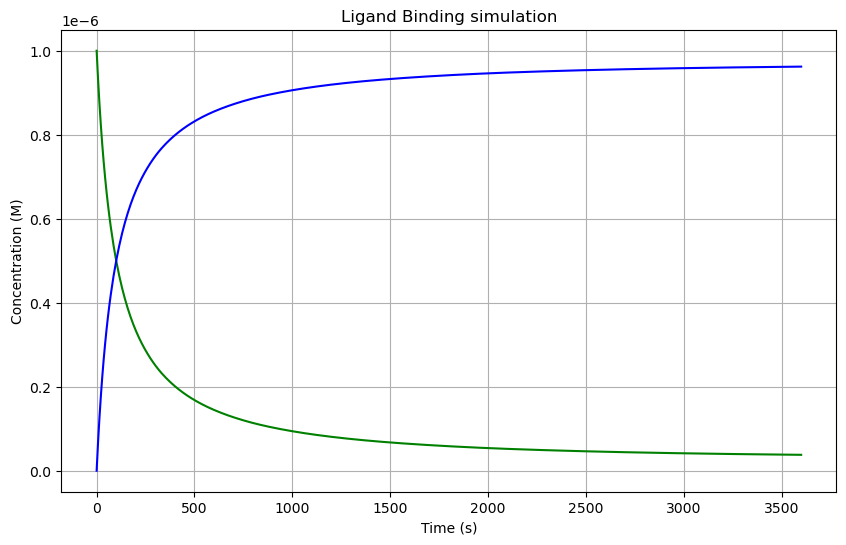

In [39]:
plt.figure(figsize = (10, 6))
plt.plot(t, L, label = 'Ligand', color = 'g')
plt.plot(t, LR, label = 'Complex', color = 'b')
plt.xlabel('Time (s)')
plt.ylabel('Concentration (M)')
plt.title('Ligand Binding simulation')
plt.grid(True)
plt.show()